<a href="https://colab.research.google.com/github/xtenix88/Data-Portfolio/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
files =  [ file for file in os.listdir('/content/sales_data')]

print(files)

# for file in files:
#   print(file)

['Sales_November_2019.csv', 'Sales_May_2019.csv', 'Sales_February_2019.csv', 'Sales_August_2019.csv', 'Sales_January_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv', 'Sales_December_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv']


In [3]:
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/sales_data/' + file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [ ]:
all_months_data.shape

(186850, 6)

In [ ]:
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Add month column

In [4]:
all_data = all_months_data.copy()

In [5]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [15]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_data = all_data.dropna(how='all')

Find 'or' and delete so we can convert to int32

In [8]:
all_data[all_data['Month'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
15280,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
17208,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
17324,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
17339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",04
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",04
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",04
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",04


In [10]:
all_data['Month'] = all_data['Month'].astype('int32')


In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [13]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99
5,278802,USB-C Charging Cable,1,11.95,11/14/19 20:34,"154 2nd St, San Francisco, CA 94016",11,11.95
6,278803,Lightning Charging Cable,1,14.95,11/11/19 08:05,"724 5th St, San Francisco, CA 94016",11,14.95
7,278804,Bose SoundSport Headphones,1,99.99,11/15/19 11:48,"866 Sunset St, Austin, TX 73301",11,99.99
8,278805,Lightning Charging Cable,1,14.95,11/27/19 11:50,"670 Elm St, San Francisco, CA 94016",11,14.95
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99


**Question 1: What was the month with the highest sales and how much is that sales?**


In [14]:
sales_sum = all_data.groupby('Month').sum()
sales_sum

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show>

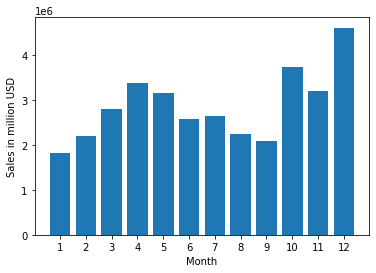

In [27]:
months = range(1,13)
plt.bar(months, sales_sum['Sales'] )
plt.xticks(months)
plt.ylabel('Sales in million USD')
plt.xlabel('Month')
plt.show

Add a city column

In [15]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1]) #split and grab the city first, then state without the zip code at the ned
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA


**Question 2: What city has the highest sales?**

In [16]:
sales_city = all_data.groupby('City').sum()
sales_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [17]:
sales_city.sort_values('Sales', ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Seattle WA,16553,2.733296e+06,104941,2.747755e+06
Portland OR,11303,1.860558e+06,70621,1.870732e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06


<function matplotlib.pyplot.show>

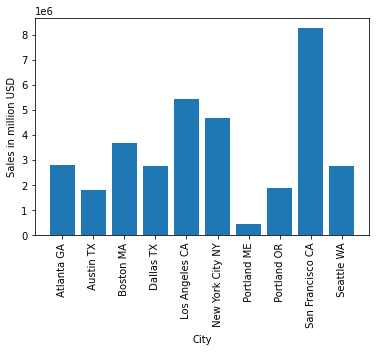

In [18]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, sales_city['Sales'] )
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in million USD')
plt.xlabel('City')
plt.show

**Question 3: What time should we display ads to maximize customers buying the products?**

In [19]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [37]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City NY,0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City NY,7,3


<function matplotlib.pyplot.show>

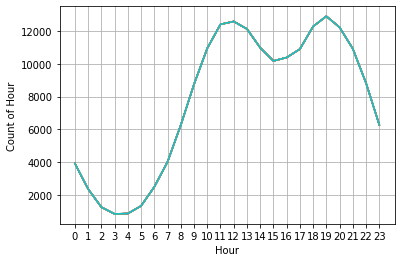

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count() )
plt.xticks(hours, rotation='horizontal')
plt.ylabel('Count of Hour')
plt.xlabel('Hour')
plt.grid()
plt.show

**Question 4: What products most often sold together?**

In [22]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
9,278806,Bose SoundSport Headphones,1,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston MA,19,12
10,278806,ThinkPad Laptop,1,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston MA,19,12
15,278811,Wired Headphones,1,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco CA,16,1
16,278811,Apple Airpods Headphones,1,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco CA,16,1
24,278819,iPhone,1,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.00,New York City NY,6,20
...,...,...,...,...,...,...,...,...,...,...,...
18336,194050,USB-C Charging Cable,1,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016",4,11.95,San Francisco CA,0,27
18342,194056,iPhone,1,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,700.00,San Francisco CA,10,5
18343,194056,Lightning Charging Cable,1,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,14.95,San Francisco CA,10,5
18348,194061,iPhone,1,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301",4,700.00,Atlanta GA,20,22


In [23]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [46]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."


In [24]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [51]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [62]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

#print(count)

for key, value in  count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 5: What products sold the most? Why?**

In [47]:
product_group = all_data.groupby('Product')
product_group.head()

quantity_ordered = proudct_group.sum()['Quantity Ordered']
quantity_ordered.sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

<function matplotlib.pyplot.show>

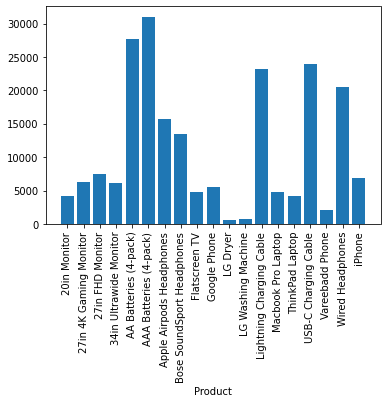

In [48]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product')
plt.show


In [51]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


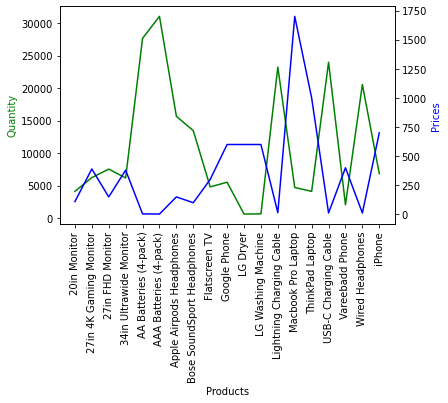

In [60]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(products, quantity_ordered, 'g-')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Prices', color='b')

plt.show()